# Ансамблевые методы
- Ансамблевые методы помогают свести к минимуму ошибки при обучении за счет уменьшения шума, смещения и дисперсии.
- Они повышают стабильность и точность алгоритмов машинного обучения.
- Объединение нескольких классификаторов уменьшает дисперсию, особенно для нестабильных классификаторов.
- Пакетирование и бустинг используют набор базовых алгоритмов обучения, таких как деревья классификации.

# Алгоритм случайного леса
- Случайный лес - это алгоритм машинного обучения с контролем, который можно использовать как для задач классификации, так и для задач регрессии.
- Он использует ансамблевое обучение, объединяя несколько деревьев решений для повышения точности прогнозирования.
- Каждое дерево решений строится на уникальном подмножестве данных, что сокращает возможность переобучения.
- Окончательный прогноз определяется большинством голосов среди деревьев решений.
- Большее количество деревьев в лесу обычно приводит к более высокой точности.

# Зачем использовать Random Forest?
- Требуется меньше времени на обучение по сравнению с другими алгоритмами.
- Он предсказывает выходные данные с высокой точностью даже для большого набора данных.
- Он также может поддерживать точность, когда отсутствует большая часть данных.

# Как работает алгоритм Random Forest?
1. Выберем случайные K точек данных из обучающего набора.
2. Построим деревья решений, связанные с выбранными точками данных, подмножествами.
3. Выберем число N для деревьев решений, которые мы хотим построить.
4. Повторим шаги 1 и 2.
5. Для новых точек данных найдём предсказания каждого дерева решений и отнесём новые точки данных к категории, которая наберет большинство голосов.

# Преимущества случайного леса:
- Он уменьшает переобучение деревьев решений и помогает повысить точность предсказания.
- Он гибок как для задач классификации, так и для задач регрессии.
- Он хорошо работает как с категориальными, так и с непрерывными значениями.
- Нормализация данных не требуется, поскольку при этом используется подход, основанный на правилах.

# Недостатки случайного леса:
- Он требует больших вычислительных мощностей, а также ресурсов, поскольку создает множество деревьев для объединения их выходных данных.
- Также требуется много времени для обучения, поскольку он объединяет множество деревьев решений для определения класса.
- Из-за совокупности деревьев принятия решений он также страдает интерпретируемостью и не позволяет определить значимость каждой переменной.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('Datasets/Loan/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df = df.rename(columns=str.lower)

In [4]:
df.shape

(614, 13)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
en = LabelEncoder()
cat = ['gender', 'married', 'education', 'self_employed', 'property_area', 'loan_status']
for cols in cat:
    df[cols] = en.fit_transform(df[cols])

In [7]:
df['dependents'].replace('3+', 3, inplace=True)

In [8]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [9]:
df.isna().sum()

loan_id               0
gender                0
married               0
dependents           15
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [10]:
df_clean = df
df_clean.drop('loan_id', axis=1, inplace=True)

In [11]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
df_clean = pd.DataFrame(imputer.fit_transform(df), columns=df_clean.columns)
df_clean.isnull().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [12]:
X = df_clean.drop(columns=['loan_status']).values
y = df_clean['loan_status'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
rfc = RandomForestClassifier(criterion='entropy', random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [16]:
scores = cross_val_score(rfc, X_train, y_train, cv=10)
print("Mean cross-validation score: %.3f" % scores.mean())

Mean cross-validation score: 0.793


In [17]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

In [18]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.74      0.47      0.57        43
         1.0       0.82      0.94      0.87       111

    accuracy                           0.81       154
   macro avg       0.78      0.70      0.72       154
weighted avg       0.80      0.81      0.79       154


In [19]:
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
pd.crosstab(y_test, y_pred_test)

[[ 20  23]
 [  7 104]]


col_0,0.0,1.0
row_0,,
0.0,20,23
1.0,7,104


<Axes: >

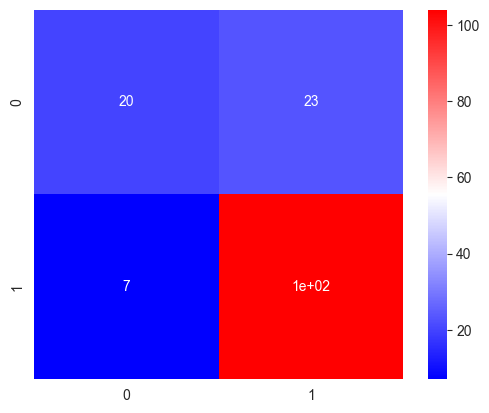

In [20]:
sns.heatmap(cm_test, square=True, annot=True, cmap='bwr')